<a href="https://colab.research.google.com/github/S-EGK/Contollers/blob/main/NLC_Ass_5_14_1_2_v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5 Problem 14.1.2
## Srikanth EGK
### M13998009

## Libraries

In [ ]:
# importing libraries
from math import cos, sin
import numpy as np
from random import random
import scipy.signal as signal
import scipy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.patches import Circle

## Parameters

### Simulation Parameters

In [ ]:
dt = 0.1
Tfinal = 30
Ts = dt
Tsteps = Tfinal/Ts # number of frames
frames = int(Tsteps)

### System Parameters

In [ ]:
# States
e1 = 0.2
e2 = 0.2

states = np.array([e1, e2])

### Datat Collection and Plot Parameters

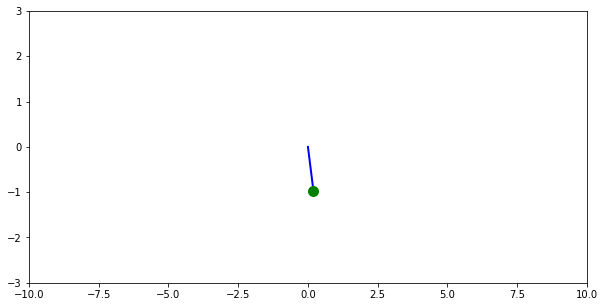

In [ ]:
# Data Collectors
f_data = []
e1_data = []
e2_data = []
r_data = []
r_dot_data = []

# Animation Parameters
rod_x = [0, sin(e1)]
rod_y = [0, -cos(e1)]

fig = plt.figure(figsize = (10,5))
ax1 = plt.subplot(1,1,1)
ax1.set_xlim((-10,10))
ax1.set_ylim((-3,3))

rod, = ax1.plot(rod_x, rod_y, 'b', lw = 2)
bob, = ax1.plot(sin(e1), -cos(e1), 'g', marker = 'o', ms = 10)

In [ ]:
def anipts(e1):
  rod_x = [0, sin(e1)]
  rod_y = [0, -cos(e1)]
  bob_x, bob_y = sin(e1), -cos(e1)

  return rod_x, rod_y, bob_x, bob_y

## Dynamics

In [ ]:
def dyna(t,y,f,ref):
  e1 = y[0]
  e2 = y[1]
  u = f
  r = ref[0]
  r_dot = ref[1]
  r_ddot = ref[2]

  e1_dot = e2 + r + sin(e1 + r) - r_dot
  e2_dot = 2*(e1+r)*(e1+r) + 3/2 * u - r_ddot

  return e1_dot, e2_dot

## Reference Trajectory

In [ ]:
def ref_traj(i):
  w = np.pi/10

  r = sin(w*i)
  r_dot = w*cos(w*i)
  r_ddot = -w*w*sin(w*i)

  ref = np.array([r, r_dot, r_ddot])

  return ref

## Sliding Mode Controller

In [ ]:
def slid_ctrl(y,ref):
  e1 = y[0]
  e2 = y[1]

  r = ref[0]
  r_dot = ref[1]
  r_ddot = ref[2]

  beta = 2
  a = 7

  s = a * e1 + e2 + sin(e1+r)
  e = 0.01

  s1 = np.absolute(s/e)

  if s1 <= 1:
    u = (2/3)*(-(a+cos(e1+r))*(e2+sin(e1+r)) - 2*(e1+r)*(e1+r) + r_ddot - beta*(s))
  elif s1 > 1:
    u = (2/3)*(-(a+cos(e1+r))*(e2+sin(e1+r)) - 2*(e1+r)*(e1+r) + r_ddot - beta*np.sign(s))

  # u = -(2/3)*(a*x2 + a*x1 + 2*x1*x1 + beta*np.sign(s))

  return u

## Solver

In [ ]:
def step(states,dt,i):
  e1 = states[0]
  e2 = states[1]

  ref = ref_traj(i)

  f = slid_ctrl(states,ref)
  f_data.append(f)

  sol = solve_ivp(lambda t,y: dyna(t,y,f,ref), [0,dt], [e1, e2], t_eval = np.linspace(0,dt,100))
  states = sol.y[:,-1].T

  return states, ref

## Iterating

In [ ]:
def drawframe(i):
  global states
  states, ref = step(states,dt,i)
  e1 = states[0]
  e2 = states[1]
  r = ref[0]
  r_dot = ref[1]

  e1_data.append(states[0]+ref[0])
  e2_data.append(states[1]+ref[1])
  r_data.append(ref[0])
  r_dot_data.append(ref[1])

  rod_x, rod_y, bob_x, bob_y = anipts(e1+r)

  rod.set_data(rod_x, rod_y)
  bob.set_data(bob_x, bob_y)

  return rod, bob

## Animation

In [ ]:
from matplotlib import animation
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=frames, interval=40, blit=True)

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())

## Plots

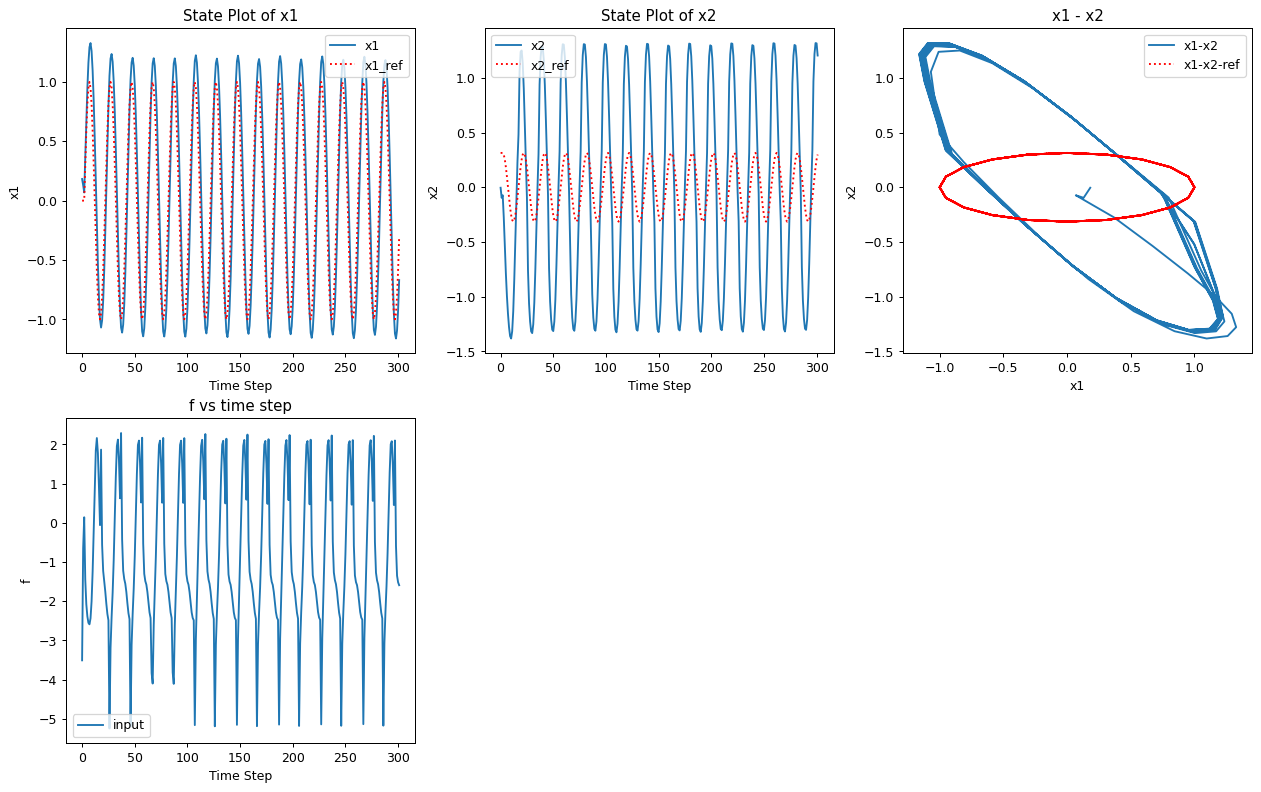

In [ ]:
fig1 = plt.figure(figsize=(17,22), dpi=90)

ax1 = fig1.add_subplot(4, 3, 1)
ax1.set_xlabel('Time Step')
ax1.set_ylabel('x1')
ax1.set_title('State Plot of x1')
x11 = ax1.plot(range(len(e1_data)),e1_data, label='x1')
r11 = ax1.plot(range(len(r_data)),r_data, 'r:', label='x1_ref')
ax1.legend(loc = "best")

ax2 = fig1.add_subplot(4, 3, 2)
ax2.set_xlabel('Time Step')
ax2.set_ylabel('x2')
ax2.set_title('State Plot of x2')
x21 = ax2.plot(range(len(e2_data)),e2_data, label='x2')
r_d1 = ax2.plot(range(len(r_dot_data)),r_dot_data, 'r:', label='x2_ref')
ax2.legend(loc = "best")

ax3 = fig1.add_subplot(4, 3, 3)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('x1 - x2')
x1x21 = ax3.plot(e1_data,e2_data, label='x1-x2')
rrd1 = ax3.plot(r_data,r_dot_data, 'r:', label='x1-x2-ref')
ax3.legend(loc = "best")

ax4 = fig1.add_subplot(4, 3, 4)
ax4.set_xlabel('Time Step')
ax4.set_ylabel('f')
ax4.set_title('f vs time step')
f1 = ax4.plot(range(len(f_data)),f_data, label='input')
ax4.legend(loc = "best")